In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 導入練習用data

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

data類型:uint8
data範圍:0~255


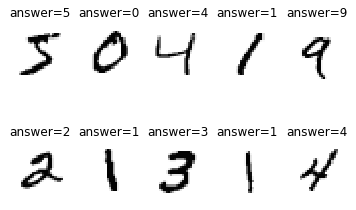

In [3]:
#觀察一下data
print('data類型:{0}\ndata範圍:{1}~{2}'.format(x_train.dtype,x_train.min(),x_train.max()))
for i in range(10):
    plt.subplot(2,5,i+1,frameon=False) #畫2行5列的圖集合中的第i+1個
    plt.title('answer={}'.format(y_train[i]))
    plt.xticks([]);plt.yticks([])
    plt.imshow(x_train[i],cmap='Greys')

# Data做normalize

In [4]:
x_train, x_test = x_train/255, x_test/255

# 建構模型

In [5]:
model=keras.models.Sequential([
keras.layers.Flatten(),
keras.layers.Dense(512,activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2207 - accuracy: 0.9343
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0970 - accuracy: 0.9703
Epoch 3/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0696 - accuracy: 0.9779
Epoch 4/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0531 - accuracy: 0.9829
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0434 - accuracy: 0.9862


In [7]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06862128818567725, 0.9801]

In [8]:
x_test0 = x_test[0:10]
y_test0 = y_test[0:10]

x0:answer=7,predict=7
x1:answer=2,predict=2
x2:answer=1,predict=1
x3:answer=0,predict=0
x4:answer=4,predict=4
x5:answer=1,predict=1
x6:answer=4,predict=4
x7:answer=9,predict=9
x8:answer=5,predict=5
x9:answer=9,predict=9


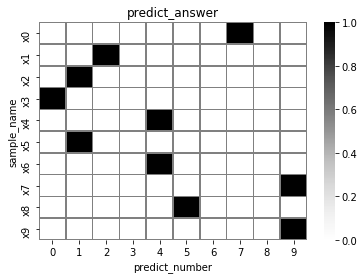

In [10]:
answer=model.predict(x_test0)
sns.heatmap(answer,cmap='Greys',linewidths=0.5,linecolor='grey',
            yticklabels=['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9'])
plt.xlabel('predict_number')
plt.ylabel('sample_name')
plt.title('predict_answer')
for i in range(10):
    print('x{0}:answer={1},predict={2}'.format(i,y_test0[i],np.argmax(answer[i])))